In [32]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from textblob import TextBlob

In [67]:
df = pd.read_csv("finalInput.csv",encoding="ISO-8859-1")

NewsTextBlob_senti = []
for i in df['NewsContent']:
    sentiment = TextBlob(str(i))
    NewsTextBlob_senti.append(sentiment.sentiment.polarity)
df['NewsTextBlob_senti'] = NewsTextBlob_senti

df.head()

,Unnamed: 0,NewsContent,author,publishedDate,title,AAPL_company,IBM_company,GOOGL_company,AMZN_company,MSFT_company,AAPL_senti,IBM_senti,GOOGL_senti,AMZN_senti,MSFT_senti,NewsTextBlob_senti
0,0,"MILAN/ROME, March 27 (Reuters) - Italian stat...",NaN,"March 27, 2019, 01:22:00 PM EDT",Italian state lender seeks to broker truce bet...,0,0,0,0,0,0,0,0,0,0,0.000000
1,1,April 5 (Reuters) - Representatives of Venezu...,NaN,"April 05, 2019, 06:23:00 PM EDT",Lawyers for Venezuela's Guaido ask U.S. court ...,0,0,0,0,0,0,0,0,0,0,-0.026667
2,2,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,"April 05, 2019, 05:49:00 PM EDT",Petrobras agrees to sell pipeline unit to Engi...,0,0,0,0,0,0,0,0,0,0,-0.010278
3,3,Top Tech Stocks MSFT -1.59% AAPL +0.61% IBM -0...,MT Newswires,"March 27, 2019, 01:18:46 PM EDT","Technology Sector Update for 03/27/2019: NTWK,...",1,0,1,0,1,1,0,-1,0,-1,-0.018604
4,4,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,"April 05, 2019, 05:49:00 PM EDT",Engie bids $8.6 bln for Petrobras pipeline uni...,0,0,0,0,0,0,0,0,0,0,-0.010278


In [16]:
df_news = df.drop(['Unnamed: 0','author','publishedDate','title'], axis = 1)

In [93]:
categories = ['AAPL_company','IBM_company','GOOGL_company','AMZN_company','MSFT_company',]
              #'AAPL_senti','IBM_senti','GOOGL_senti','AMZN_senti','MSFT_senti']
train,test = train_test_split(df_news,random_state=42,test_size=0.2,shuffle=True)
x_train = train.NewsContent
x_test = test.NewsContent


# Multinomial NB

In [97]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

parametersNB = {'clf__estimator__alpha':np.linspace(0.5, 1.5, 6),
              #'clf__estimator__prior':[True,False]
               }

cvNB = GridSearchCV(NB_pipeline,param_grid = parametersNB,cv= 5)

for category in categories:
    print('... Processing {}'.format(category))
    cvNB.fit(x_train,train[category])
    prediction_NB = cvNB.predict(x_test)
    print("Tuned Best Score: ", cvNB.best_score_)
    print("Tuned Best Params: {}".format(cvNB.best_params_))
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction_NB)))
    print(classification_report(test[category],prediction))
    

... Processing AAPL_company
Tuned Best Score:  0.8991228070175439
Tuned Best Params: {'clf__estimator__alpha': 0.5}
Test accuracy is 0.8596491228070176
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       1.00      0.60      0.75        25

   micro avg       0.82      0.82      0.82        57
   macro avg       0.88      0.80      0.81        57
weighted avg       0.87      0.82      0.81        57

... Processing IBM_company
Tuned Best Score:  0.9736842105263158
Tuned Best Params: {'clf__estimator__alpha': 0.5}
Test accuracy is 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57

... Processing GOOGL_company
Tuned Best Sco

# SVC

In [98]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(svm.SVC(), n_jobs=1)),
            ])
parameters = {'clf__estimator__kernel':('linear','rbf','sigmoid','poly'),
              'clf__estimator__C':[1,50]}

cv = GridSearchCV(SVC_pipeline,param_grid = parameters,cv=5)

for category in categories:
    print('... Processing {}'.format(category))
    cv.fit(x_train,train[category])
    prediction = cv.predict(x_test)
    print("Tuned Best Score: ", cv.best_score_)
    print("Tuned Best Params: {}".format(cv.best_params_))
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(classification_report(test[category],prediction))

... Processing AAPL_company
Tuned Best Score:  0.9385964912280702
Tuned Best Params: {'clf__estimator__C': 50, 'clf__estimator__kernel': 'linear'}
Test accuracy is 0.9473684210526315
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.96      0.92      0.94        25

   micro avg       0.95      0.95      0.95        57
   macro avg       0.95      0.94      0.95        57
weighted avg       0.95      0.95      0.95        57

... Processing IBM_company
Tuned Best Score:  0.9692982456140351
Tuned Best Params: {'clf__estimator__C': 50, 'clf__estimator__kernel': 'linear'}
Test accuracy is 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98   

# Predict

In [102]:
df_predict = pd.read_csv("new20190421_predict.csv",encoding="ISO-8859-1")
predict_result = []
for category in categories:
    print('... Processing {}'.format(category))
    cv.fit(x_train,train[category])
    predicationTest = cv.predict(df_predict.NewsContent)
    predict_result.append(predicationTest)
    #print('Test result is {}'.format(predicationTest))

... Processing AAPL_company
... Processing IBM_company
... Processing GOOGL_company
... Processing AMZN_company
... Processing MSFT_company


In [146]:
predict = pd.DataFrame(predict_result)
predict = predict.T

In [147]:
predict = predict.rename(index=str, columns={0: "APPL_company", 1: "IBM_company",
                                             2:"GOOGL_company",3:"AMZN_company",4:"MSFT_company"})
predict= predict.reset_index()
df_predict= df_predict.reset_index()
predictResult = pd.concat([df_predict,predict],axis=1)
predictResult.head() 

In [150]:
predictResult.to_csv('predictResult.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f1 = pd.read_csv('F1SCORE.csv')
f1[['CLASS'] ]= f1[['CLASS']].astype('str')
f1.head()

,COMPANY,CLASS,MODEL,F1-SCORE
0,APPL,0,NB,0.86
1,APPL,1,NB,0.75
2,APPL,0,SVC,0.95
3,APPL,1,SVC,0.94
4,GOOGL,0,SVC,0.98


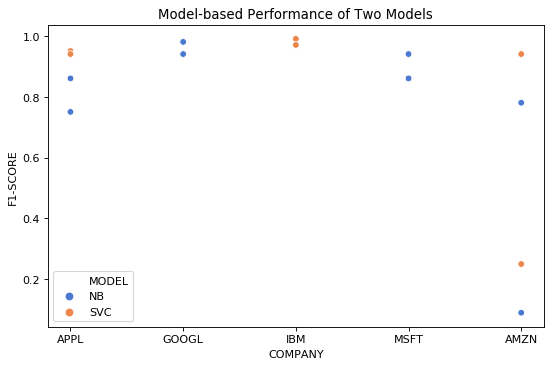

In [3]:
plt.figure(figsize=(8,5),dpi=80)
ax =  sns.scatterplot(x='COMPANY',y = 'F1-SCORE',hue = 'MODEL',data = f1,palette='muted')
plt.title('Model-based Performance of Two Models')
plt.show()

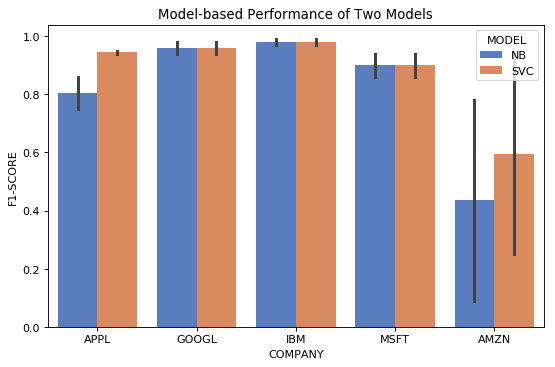

In [4]:
plt.figure(figsize=(8,5),dpi=80)
ax =  sns.barplot(x='COMPANY',y = 'F1-SCORE',hue = 'MODEL',data = f1,palette='muted')
plt.title('Model-based Performance of Two Models')
plt.show()

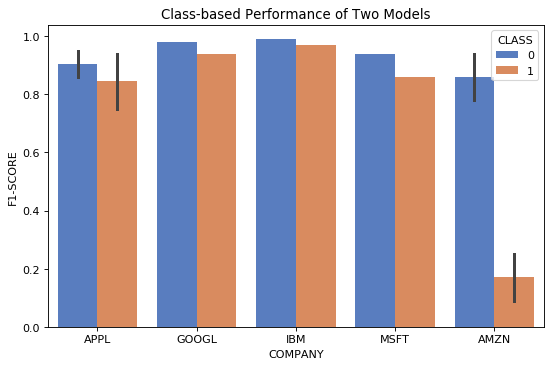

In [5]:
plt.figure(figsize=(8,5),dpi=80)
ax =  sns.barplot(x='COMPANY',y = 'F1-SCORE',hue = 'CLASS',data = f1,palette='muted')
plt.title('Class-based Performance of Two Models')
plt.show()